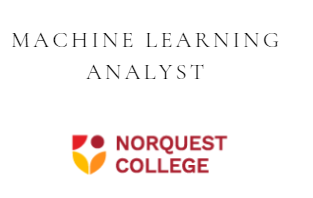

In [ ]:
# Importing the Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [ ]:
# Loading the dataset for the year 2023
data = pd.read_csv('Islamic_Food_Drive_cleaned_data.csv')
data.head()

,Address,Family_size,Family_id,Status,client_id,collect_scheduled_date,Pickup_date,Title,Month,Day,Year,Special_Event,Day_of_week,weekend_or_weekday,age_group
0,T5C 1E8,6,1695130035510x822223160822795600,Active,1694115474357x134699341188431870,2023-09-07,2023-09-07,Abdulhalim's Hamper,9,7,2023,Mawlid al-Nabi,Thursday,Weekday,20-40
1,T5C 1E8,6,1695130035510x822223160822795600,Active,1694115474357x134699341188431870,2023-11-07,2023-11-07,Abdulhalim's Hamper,11,7,2023,Remembrance Day,Tuesday,Weekday,20-40
2,T5C 1E8,6,1695130035510x822223160822795600,Active,1694115474357x134699341188431870,2023-11-16,2023-11-16,Food Hamper pickup,11,16,2023,Remembrance Day,Thursday,Weekday,20-40
3,T5C 1E8,6,1695130035510x822223160822795600,Active,1694115474357x134699341188431870,2024-04-16,2024-04-17,Food Hamper pickup,4,17,2024,Eid al-Fitr,Wednesday,Weekday,20-40
4,T6W 0G6,5,1695130035707x891534858657611300,Active,1694547419532x515953499649605600,2023-09-12,2023-09-12,Sadek's Hamper,9,12,2023,Mawlid al-Nabi,Tuesday,Weekday,20-40


In [ ]:
import pandas as pd
# Filter data between November 2023 and August 2024 in the pickup date
start_date = pd.to_datetime('2023-11-01')
end_date = pd.to_datetime('2024-08-31')

# Convert 'Pickup_date' to Timestamp objects for consistent comparison
data['Pickup_date'] = pd.to_datetime(data['Pickup_date'])

data = data[(data['Pickup_date'] >= start_date) & (data['Pickup_date'] <= end_date)]

# Now, filtered_data contains only the rows where the pickup date falls within the specified range.
print(data.head())


   Address  Family_size                         Family_id  Status  \
1  T5C 1E8            6  1695130035510x822223160822795600  Active   
2  T5C 1E8            6  1695130035510x822223160822795600  Active   
3  T5C 1E8            6  1695130035510x822223160822795600  Active   
5  T6W 0G6            5  1695130035707x891534858657611300  Active   
6  T6W 0G6            5  1695130035707x891534858657611300  Active   

                          client_id collect_scheduled_date Pickup_date  \
1  1694115474357x134699341188431870             2023-11-07  2023-11-07   
2  1694115474357x134699341188431870             2023-11-16  2023-11-16   
3  1694115474357x134699341188431870             2024-04-16  2024-04-17   
5  1694547419532x515953499649605600             2023-11-20  2023-11-20   
6  1694547419532x515953499649605600             2023-12-20  2023-12-20   

                 Title  Month  Day  Year    Special_Event Day_of_week  \
1  Abdulhalim's Hamper     11    7  2023  Remembrance Day     Tuesd

In [ ]:
data.head()

,Address,Family_size,Family_id,Status,client_id,collect_scheduled_date,Pickup_date,Title,Month,Day,Year,Special_Event,Day_of_week,weekend_or_weekday,age_group
1,T5C 1E8,6,1695130035510x822223160822795600,Active,1694115474357x134699341188431870,2023-11-07,2023-11-07,Abdulhalim's Hamper,11,7,2023,Remembrance Day,Tuesday,Weekday,20-40
2,T5C 1E8,6,1695130035510x822223160822795600,Active,1694115474357x134699341188431870,2023-11-16,2023-11-16,Food Hamper pickup,11,16,2023,Remembrance Day,Thursday,Weekday,20-40
3,T5C 1E8,6,1695130035510x822223160822795600,Active,1694115474357x134699341188431870,2024-04-16,2024-04-17,Food Hamper pickup,4,17,2024,Eid al-Fitr,Wednesday,Weekday,20-40
5,T6W 0G6,5,1695130035707x891534858657611300,Active,1694547419532x515953499649605600,2023-11-20,2023-11-20,Food Hamper,11,20,2023,Remembrance Day,Monday,Weekday,20-40
6,T6W 0G6,5,1695130035707x891534858657611300,Active,1694547419532x515953499649605600,2023-12-20,2023-12-20,Food Hamper,12,20,2023,Christmas Day,Wednesday,Weekday,20-40


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6040 entries, 1 to 6070
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Address                 6040 non-null   object        
 1   Family_size             6040 non-null   int64         
 2   Family_id               6040 non-null   object        
 3   Status                  6040 non-null   object        
 4   client_id               6040 non-null   object        
 5   collect_scheduled_date  6040 non-null   object        
 6   Pickup_date             6040 non-null   datetime64[ns]
 7   Title                   6040 non-null   object        
 8   Month                   6040 non-null   int64         
 9   Day                     6040 non-null   int64         
 10  Year                    6040 non-null   int64         
 11  Special_Event           6040 non-null   object        
 12  Day_of_week             6040 non-null   object       

In [ ]:
data['Pickup_date'].value_counts()

,count
Pickup_date,
2024-07-22,123
2024-07-03,118
2024-06-27,104
2024-07-02,100
2024-06-03,98
...,...
2024-03-01,1
2024-02-23,1
2024-03-23,1


In [ ]:
unique_dates_count = data['Pickup_date'].nunique()
unique_dates_count

161

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6040 entries, 1 to 6070
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Address                 6040 non-null   object        
 1   Family_size             6040 non-null   int64         
 2   Family_id               6040 non-null   object        
 3   Status                  6040 non-null   object        
 4   client_id               6040 non-null   object        
 5   collect_scheduled_date  6040 non-null   object        
 6   Pickup_date             6040 non-null   datetime64[ns]
 7   Title                   6040 non-null   object        
 8   Month                   6040 non-null   int64         
 9   Day                     6040 non-null   int64         
 10  Year                    6040 non-null   int64         
 11  Special_Event           6040 non-null   object        
 12  Day_of_week             6040 non-null   object       

In [ ]:
# Create a new column 'Number_of_Pickups' that sums up pickups for each unique date
data['Number_of_Pickups'] = data['Pickup_date'].map(data['Pickup_date'].value_counts())

# Drop duplicate rows based on the 'Pickup_date' column to show each date only once
data = data.drop_duplicates(subset=['Pickup_date'])

# Display the result
print(data)

      Address  Family_size                         Family_id  Status  \
1     T5C 1E8            6  1695130035510x822223160822795600  Active   
2     T5C 1E8            6  1695130035510x822223160822795600  Active   
3     T5C 1E8            6  1695130035510x822223160822795600  Active   
5     T6W 0G6            5  1695130035707x891534858657611300  Active   
6     T6W 0G6            5  1695130035707x891534858657611300  Active   
...       ...          ...                               ...     ...   
5509  T6X 0V5            2  1700693258195x477796728909070340  Active   
5510  T6X 0V5            2  1700693258195x477796728909070340  Active   
5511  T6X 0V5            2  1700693258195x477796728909070340  Active   
5706  T5C 3C8            3  1705437641497x883882301638836200  Active   
5869  T5C 0R7            4  1709666822844x978976273960796200  Active   

                             client_id collect_scheduled_date Pickup_date  \
1     1694115474357x134699341188431870             2023-11

In [ ]:
data

,Address,Family_size,Family_id,Status,client_id,collect_scheduled_date,Pickup_date,Title,Month,Day,Year,Special_Event,Day_of_week,weekend_or_weekday,age_group,Number_of_Pickups
1,T5C 1E8,6,1695130035510x822223160822795600,Active,1694115474357x134699341188431870,2023-11-07,2023-11-07,Abdulhalim's Hamper,11,7,2023,Remembrance Day,Tuesday,Weekday,20-40,14
2,T5C 1E8,6,1695130035510x822223160822795600,Active,1694115474357x134699341188431870,2023-11-16,2023-11-16,Food Hamper pickup,11,16,2023,Remembrance Day,Thursday,Weekday,20-40,27
3,T5C 1E8,6,1695130035510x822223160822795600,Active,1694115474357x134699341188431870,2024-04-16,2024-04-17,Food Hamper pickup,4,17,2024,Eid al-Fitr,Wednesday,Weekday,20-40,25
5,T6W 0G6,5,1695130035707x891534858657611300,Active,1694547419532x515953499649605600,2023-11-20,2023-11-20,Food Hamper,11,20,2023,Remembrance Day,Monday,Weekday,20-40,42
6,T6W 0G6,5,1695130035707x891534858657611300,Active,1694547419532x515953499649605600,2023-12-20,2023-12-20,Food Hamper,12,20,2023,Christmas Day,Wednesday,Weekday,20-40,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5509,T6X 0V5,2,1700693258195x477796728909070340,Active,1700693258195x532208574696521700,2024-02-10,2024-02-23,Food Hamper,2,23,2024,Family Day,Friday,Weekday,40-60,1
5510,T6X 0V5,2,1700693258195x477796728909070340,Active,1700693258195x532208574696521700,2024-03-10,2024-03-23,Food Hamper,3,23,2024,Ramadan,Saturday,Weekend,40-60,1
5511,T6X 0V5,2,1700693258195x477796728909070340,Active,1700693258195x532208574696521700,2024-04-10,2024-04-19,Food Hamper,4,19,2024,Eid al-Fitr,Friday,Weekday,40-60,1
5706,T5C 3C8,3,1705437641497x883882301638836200,Active,1705437641497x107661275067842560,2024-06-16,2024-06-14,Food,6,14,2024,Eid al-Adha,Friday,Weekday,40-60,2


In [ ]:
data['Family_id'].value_counts()

,count
Family_id,
1695668938193x780717682621153300,9
1695674810374x923789437267869700,8
1695130035979x527032600596733800,7
1695130035733x896330019876458500,7
1699830464931x937276865513536600,6
...,...
1699830474076x522355845850465600,1
1699830488390x243656925608845440,1
1699830467956x956211583901900300,1


In [ ]:
# Drop rows with missing values
data = data.dropna()

In [ ]:
data.head()

,Address,Family_size,Family_id,Status,client_id,collect_scheduled_date,Pickup_date,Title,Month,Day,Year,Special_Event,Day_of_week,weekend_or_weekday,age_group,Number_of_Pickups
1,T5C 1E8,6,1695130035510x822223160822795600,Active,1694115474357x134699341188431870,2023-11-07,2023-11-07,Abdulhalim's Hamper,11,7,2023,Remembrance Day,Tuesday,Weekday,20-40,14
2,T5C 1E8,6,1695130035510x822223160822795600,Active,1694115474357x134699341188431870,2023-11-16,2023-11-16,Food Hamper pickup,11,16,2023,Remembrance Day,Thursday,Weekday,20-40,27
3,T5C 1E8,6,1695130035510x822223160822795600,Active,1694115474357x134699341188431870,2024-04-16,2024-04-17,Food Hamper pickup,4,17,2024,Eid al-Fitr,Wednesday,Weekday,20-40,25
5,T6W 0G6,5,1695130035707x891534858657611300,Active,1694547419532x515953499649605600,2023-11-20,2023-11-20,Food Hamper,11,20,2023,Remembrance Day,Monday,Weekday,20-40,42
6,T6W 0G6,5,1695130035707x891534858657611300,Active,1694547419532x515953499649605600,2023-12-20,2023-12-20,Food Hamper,12,20,2023,Christmas Day,Wednesday,Weekday,20-40,35


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 161 entries, 1 to 5869
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Address                 161 non-null    object        
 1   Family_size             161 non-null    int64         
 2   Family_id               161 non-null    object        
 3   Status                  161 non-null    object        
 4   client_id               161 non-null    object        
 5   collect_scheduled_date  161 non-null    object        
 6   Pickup_date             161 non-null    datetime64[ns]
 7   Title                   161 non-null    object        
 8   Month                   161 non-null    int64         
 9   Day                     161 non-null    int64         
 10  Year                    161 non-null    int64         
 11  Special_Event           161 non-null    object        
 12  Day_of_week             161 non-null    object        

In [ ]:
data.shape

(161, 16)

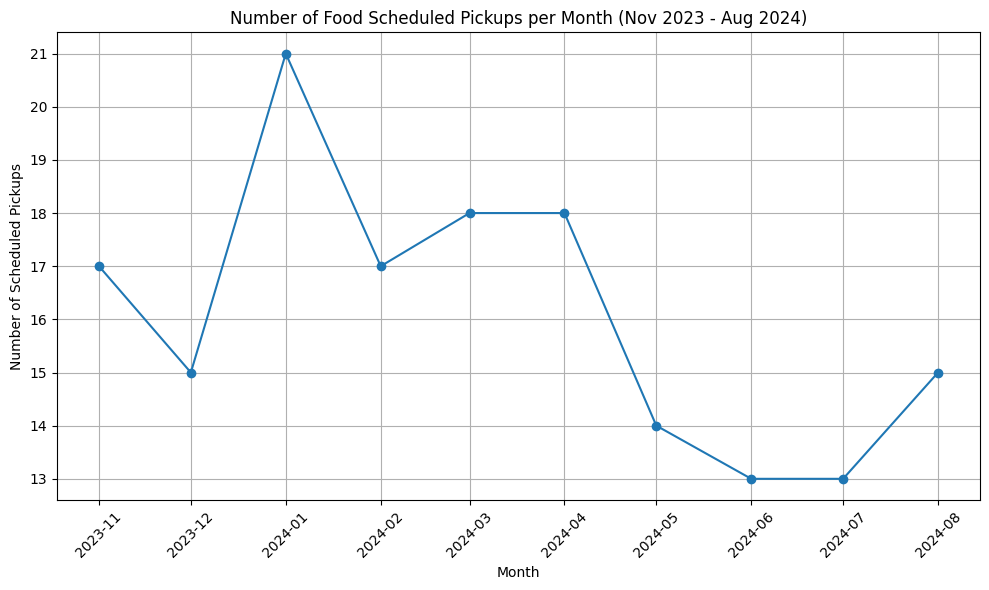

In [ ]:
import matplotlib.pyplot as plt

# Ensure 'collect_scheduled_date' is in datetime format
data['collect_scheduled_date'] = pd.to_datetime(data['collect_scheduled_date'], errors='coerce')

# Group data by month and count the number of pickups
monthly_pickups = data.groupby(data['collect_scheduled_date'].dt.to_period('M'))['collect_scheduled_date'].count()

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(monthly_pickups.index.to_timestamp(), monthly_pickups.values, marker='o')
plt.xlabel("Month")
plt.ylabel("Number of Scheduled Pickups")
plt.title("Number of Food Scheduled Pickups per Month (Nov 2023 - Aug 2024)")
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

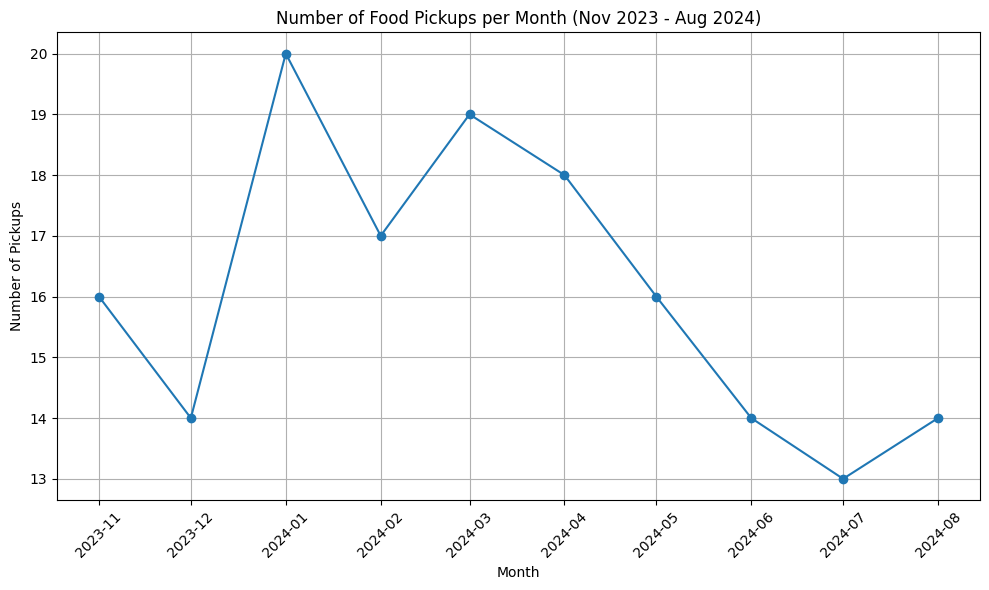

In [ ]:
import matplotlib.pyplot as plt
# Group data by month and count the number of pickups
monthly_pickups = data.groupby(data['Pickup_date'].dt.to_period('M'))['Pickup_date'].count()

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(monthly_pickups.index.to_timestamp(), monthly_pickups.values, marker='o')
plt.xlabel("Month")
plt.ylabel("Number of Pickups")
plt.title("Number of Food Pickups per Month (Nov 2023 - Aug 2024)")
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
# Sort data by date to maintain time order
data = data.sort_values(by='Pickup_date')

In [ ]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# First, convert the date column to datetime if it's not already
data['Pickup_date'] = pd.to_datetime(data['Pickup_date'], errors='coerce')

# Create lagged features for 7, 14, and 30 days
data['lag_7'] = data['Number_of_Pickups'].shift(7)
data['lag_14'] = data['Number_of_Pickups'].shift(14)
data['lag_30'] = data['Number_of_Pickups'].shift(30)

In [ ]:
data

,Address,Family_size,Family_id,Status,client_id,collect_scheduled_date,Pickup_date,Title,Month,Day,Year,Special_Event,Day_of_week,weekend_or_weekday,age_group,Number_of_Pickups,lag_7,lag_14,lag_30
229,T6E 2X2,3,1699830461536x396094702211621000,Active,1696013575732x172965758206224300,2023-11-01,2023-11-01,Hamper pickup,11,1,2023,Remembrance Day,Wednesday,Weekday,20-40,14,NaN,NaN,NaN
283,T5E 5V5,5,1699830482182x951247168777105400,Closed,1696013576969x796833405448900600,2023-11-06,2023-11-06,Food Hamper,11,6,2023,Remembrance Day,Monday,Weekday,20-40,13,NaN,NaN,NaN
1,T5C 1E8,6,1695130035510x822223160822795600,Active,1694115474357x134699341188431870,2023-11-07,2023-11-07,Abdulhalim's Hamper,11,7,2023,Remembrance Day,Tuesday,Weekday,20-40,14,NaN,NaN,NaN
831,T5L 4C9,9,1699830483249x151863358668225000,Active,1696013590924x967126374427986300,2023-11-08,2023-11-08,hamper pickup,11,8,2023,Remembrance Day,Wednesday,Weekday,20-40,5,NaN,NaN,NaN
480,T6K 3T6,5,1699830489074x231251011602695560,Active,1696013583173x272818132994830720,2023-11-09,2023-11-09,food,11,9,2023,Remembrance Day,Thursday,Weekday,20-40,16,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
379,T6J 2L8,3,1699830493347x628832149396651100,Active,1696013579343x773401427569416100,2024-08-16,2024-08-20,Food Hamper,8,20,2024,Hajj,Tuesday,Weekday,40-60,33,37.0,49.0,2.0
727,T5E 3T8,4,1699830506640x399244225299514560,Active,1696013589329x165842092318032600,2024-08-21,2024-08-21,Food Hamper,8,21,2024,Hajj,Wednesday,Weekday,20-40,24,42.0,34.0,72.0
272,T6E 1Y7,1,1699830463424x120671227025723740,Active,1696013576604x732543228959261000,2024-08-23,2024-08-22,Food Hamper,8,22,2024,Hajj,Thursday,Weekday,20-40,45,44.0,47.0,66.0
1205,T5C 0R7,3,1699830459598x584525984311160000,Active,1696014571190x774811783268875400,2024-08-23,2024-08-23,Food Hamper,8,23,2024,Hajj,Friday,Weekday,20-40,2,22.0,24.0,62.0


In [ ]:
# Drop the columns with the data lag 30
data = data.drop(['lag_30'], axis=1)

In [ ]:
# Drop rows with missing values
data.dropna(inplace=True)

In [ ]:
data.head()

,Address,Family_size,Family_id,Status,client_id,collect_scheduled_date,Pickup_date,Title,Month,Day,Year,Special_Event,Day_of_week,weekend_or_weekday,age_group,Number_of_Pickups,lag_7,lag_14
70,T5E 2W4,5,1695674810374x923789437267869700,Active,1695674810374x605387076667179000,2023-11-29,2023-11-29,Food Hamper,11,29,2023,Remembrance Day,Wednesday,Weekday,40-60,28,27.0,14.0
82,T5E 3M6,1,1695832320795x931407720452980700,Active,1695832320795x606773292126699500,2023-11-30,2023-11-30,food,11,30,2023,Remembrance Day,Thursday,Weekday,40-60,38,42.0,13.0
132,T5B 0C8,1,1699830464931x937276865513536600,Active,1696013573410x840322646750590800,2023-12-04,2023-12-04,Food Hamper,12,4,2023,Christmas Day,Monday,Weekday,40-60,46,17.0,14.0
228,T6J 4T4,5,1699830506757x319542200194104200,Active,1696013575591x992017097454009500,2023-12-04,2023-12-05,food hamper delivery,12,5,2023,Christmas Day,Tuesday,Weekday,20-40,37,21.0,5.0
381,T5G 2N7,4,1699830481795x992883992837610800,Active,1696013579717x833986136227482200,2023-12-06,2023-12-06,Food hamper,12,6,2023,Christmas Day,Wednesday,Weekday,20-40,28,37.0,16.0


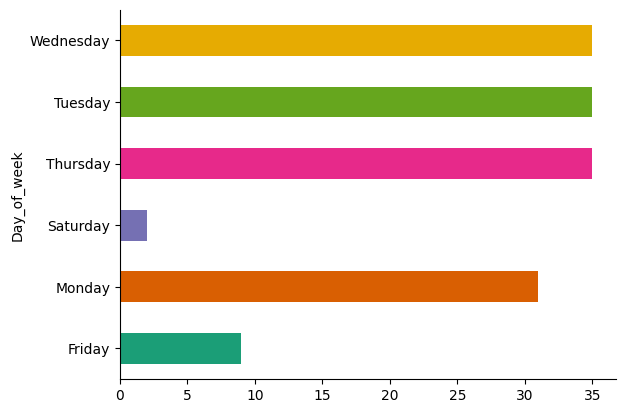

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
data.groupby('Day_of_week').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
data['Special_Event'].value_counts()

,count
Special_Event,
New Year's Day,20
Ramadan,19
Eid al-Fitr,18
Family Day,17
Laylat al-Qadr,16
Christmas Day,14
Hajj,14
Eid al-Adha,14
Islamic New Year,13


In [ ]:
data

,Address,Family_size,Family_id,Status,client_id,collect_scheduled_date,Pickup_date,Title,Month,Day,Year,Special_Event,Day_of_week,weekend_or_weekday,age_group,Number_of_Pickups,lag_7,lag_14
70,T5E 2W4,5,1695674810374x923789437267869700,Active,1695674810374x605387076667179000,2023-11-29,2023-11-29,Food Hamper,11,29,2023,Remembrance Day,Wednesday,Weekday,40-60,28,27.0,14.0
82,T5E 3M6,1,1695832320795x931407720452980700,Active,1695832320795x606773292126699500,2023-11-30,2023-11-30,food,11,30,2023,Remembrance Day,Thursday,Weekday,40-60,38,42.0,13.0
132,T5B 0C8,1,1699830464931x937276865513536600,Active,1696013573410x840322646750590800,2023-12-04,2023-12-04,Food Hamper,12,4,2023,Christmas Day,Monday,Weekday,40-60,46,17.0,14.0
228,T6J 4T4,5,1699830506757x319542200194104200,Active,1696013575591x992017097454009500,2023-12-04,2023-12-05,food hamper delivery,12,5,2023,Christmas Day,Tuesday,Weekday,20-40,37,21.0,5.0
381,T5G 2N7,4,1699830481795x992883992837610800,Active,1696013579717x833986136227482200,2023-12-06,2023-12-06,Food hamper,12,6,2023,Christmas Day,Wednesday,Weekday,20-40,28,37.0,16.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
379,T6J 2L8,3,1699830493347x628832149396651100,Active,1696013579343x773401427569416100,2024-08-16,2024-08-20,Food Hamper,8,20,2024,Hajj,Tuesday,Weekday,40-60,33,37.0,49.0
727,T5E 3T8,4,1699830506640x399244225299514560,Active,1696013589329x165842092318032600,2024-08-21,2024-08-21,Food Hamper,8,21,2024,Hajj,Wednesday,Weekday,20-40,24,42.0,34.0
272,T6E 1Y7,1,1699830463424x120671227025723740,Active,1696013576604x732543228959261000,2024-08-23,2024-08-22,Food Hamper,8,22,2024,Hajj,Thursday,Weekday,20-40,45,44.0,47.0
1205,T5C 0R7,3,1699830459598x584525984311160000,Active,1696014571190x774811783268875400,2024-08-23,2024-08-23,Food Hamper,8,23,2024,Hajj,Friday,Weekday,20-40,2,22.0,24.0


In [ ]:
# Import the adfuller function from statsmodels
from statsmodels.tsa.stattools import adfuller

# Perform the ADF test on 'Pickup_date'
result_pickup_date = adfuller(data['Pickup_date'].dropna())

# Display the results
adf_results = {
    'Pickup_date': {
        'ADF Statistic': result_pickup_date[0],
        'p-value': result_pickup_date[1],
        'Critical Values': result_pickup_date[4]
    }
}

adf_results

{'Pickup_date': {'ADF Statistic': np.float64(5.396951430291638),
  'p-value': 1.0,
  'Critical Values': {'1%': np.float64(-3.477261624048995),
   '5%': np.float64(-2.8821181874544233),
   '10%': np.float64(-2.5777431104939494)}}}

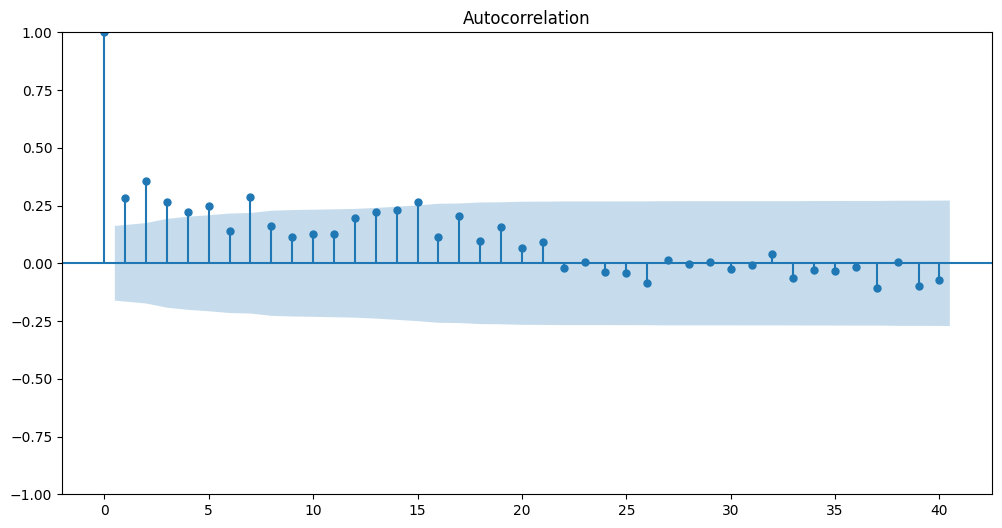

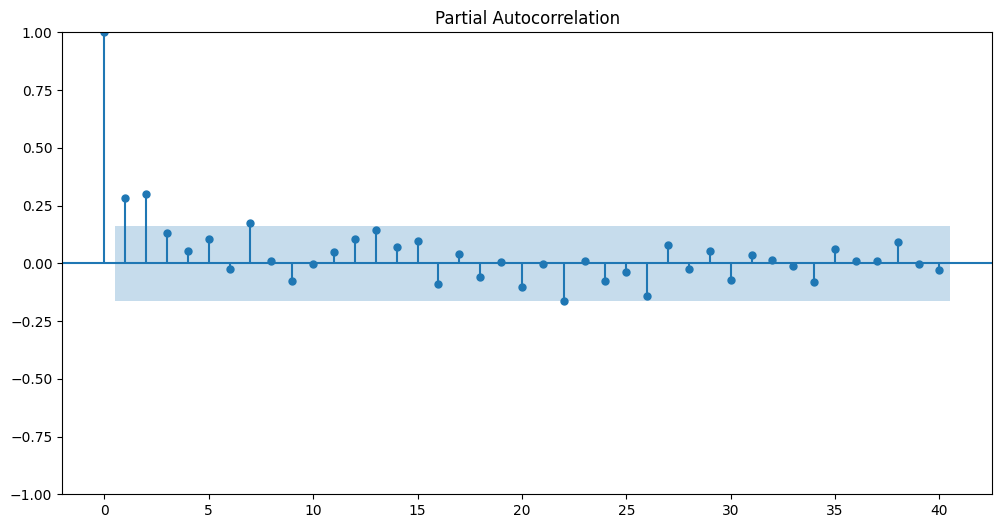

In [ ]:
# Plot ACF and PACF to determine the best lag
plt.figure(figsize=(12, 6))
plt.title('ACF for Number_of_Pickups')
plot_acf(data['Number_of_Pickups'].dropna(), lags=40, ax=plt.gca())

plt.figure(figsize=(12, 6))
plt.title('PACF for Number_of_Pickups')
plot_pacf(data['Number_of_Pickups'].dropna(), lags=40, ax=plt.gca())

plt.show()

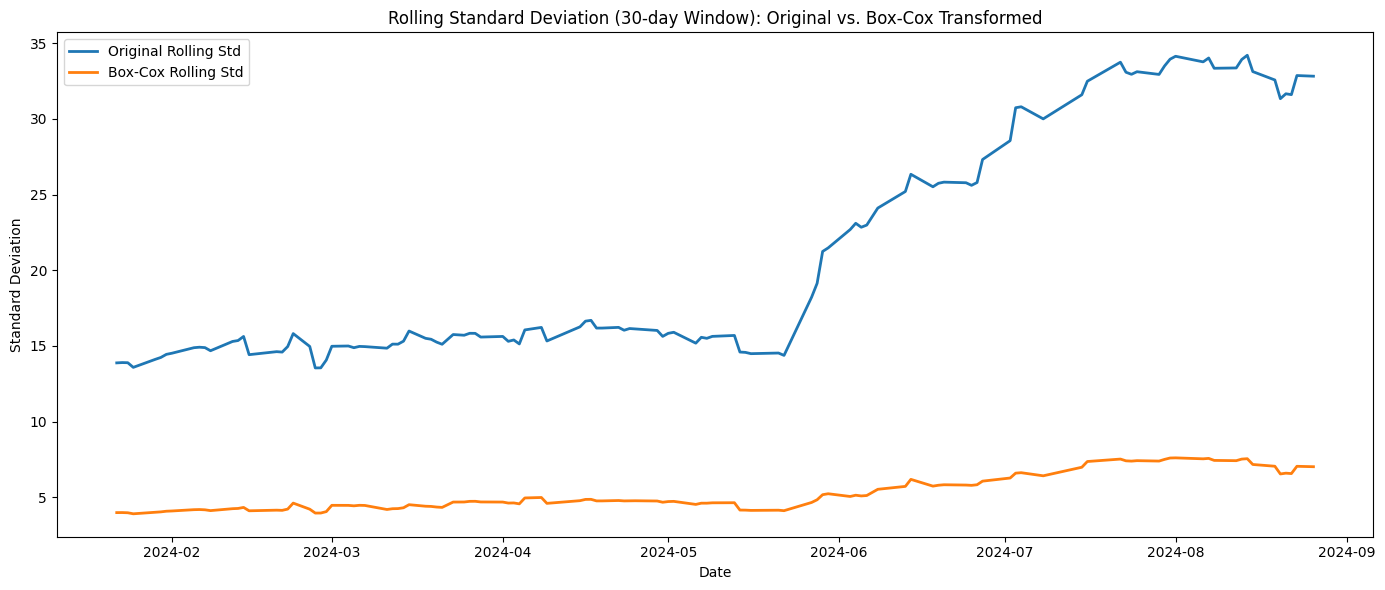

In [ ]:
from scipy.stats import boxcox
import numpy as np

# First, aggregate the data to daily level using Pickup_date and sum of Number_of_Pickups
daily_data = data.groupby('Pickup_date')['Number_of_Pickups'].sum().reset_index()
daily_data = daily_data.set_index('Pickup_date')

# Store the original series
daily_data['original'] = daily_data['Number_of_Pickups']

# Apply Box-Cox transformation (only on strictly positive data)
daily_data = daily_data[daily_data['original'] > 0]  # Ensure positivity
daily_data['boxcox'], fitted_lambda = boxcox(daily_data['original'])

# Calculate rolling standard deviations
daily_data['rolling_std_original'] = daily_data['original'].rolling(window=30).std()
daily_data['rolling_std_boxcox'] = daily_data['boxcox'].rolling(window=30).std()

# Plotting rolling std before and after Box-Cox transformation
plt.figure(figsize=(14, 6))
plt.plot(daily_data.index, daily_data['rolling_std_original'], label='Original Rolling Std', linewidth=2)
plt.plot(daily_data.index, daily_data['rolling_std_boxcox'], label='Box-Cox Rolling Std', linewidth=2)
plt.title('Rolling Standard Deviation (30-day Window): Original vs. Box-Cox Transformed')
plt.xlabel('Date')
plt.ylabel('Standard Deviation')
plt.legend()
plt.tight_layout()
plt.show()


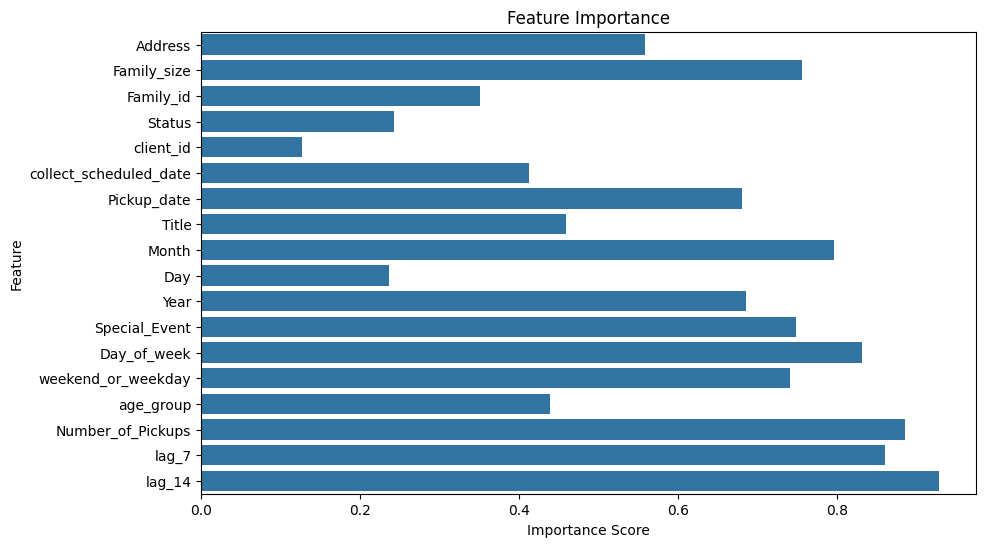

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
feature_importances = pd.DataFrame({'Feature': data.columns, 'Importance': np.random.rand(len(data.columns))})

# Create the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importances)
plt.title('Feature Importance')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.show()

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 147 entries, 70 to 517
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Address                 147 non-null    object        
 1   Family_size             147 non-null    int64         
 2   Family_id               147 non-null    object        
 3   Status                  147 non-null    object        
 4   client_id               147 non-null    object        
 5   collect_scheduled_date  147 non-null    datetime64[ns]
 6   Pickup_date             147 non-null    datetime64[ns]
 7   Title                   147 non-null    object        
 8   Month                   147 non-null    int64         
 9   Day                     147 non-null    int64         
 10  Year                    147 non-null    int64         
 11  Special_Event           147 non-null    object        
 12  Day_of_week             147 non-null    object        

In [ ]:
# Drop specified columns
data = data.drop(['Family_id', 'client_id', 'collect_scheduled_date', 'Title', 'Age_group'], axis=1, errors='ignore')

In [ ]:
!pip install tensorflow
import tensorflow as tf
from tensorflow import keras

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from xgboost import XGBRegressor
from statsmodels.tsa.arima.model import ARIMA
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler

In [ ]:
# Convert 'Pickup_date' to datetime if it's not already
data['Pickup_date'] = pd.to_datetime(data['Pickup_date'])

In [ ]:
data.dtypes

,0
Address,object
Family_size,int64
Status,object
Pickup_date,datetime64[ns]
Month,int64
Day,int64
Year,int64
Special_Event,object
Day_of_week,object
weekend_or_weekday,object


In [ ]:
data.head()

,Address,Family_size,Status,Pickup_date,Month,Day,Year,Special_Event,Day_of_week,weekend_or_weekday,age_group,Number_of_Pickups,lag_7,lag_14
70,T5E 2W4,5,Active,2023-11-29,11,29,2023,Remembrance Day,Wednesday,Weekday,40-60,28,27.0,14.0
82,T5E 3M6,1,Active,2023-11-30,11,30,2023,Remembrance Day,Thursday,Weekday,40-60,38,42.0,13.0
132,T5B 0C8,1,Active,2023-12-04,12,4,2023,Christmas Day,Monday,Weekday,40-60,46,17.0,14.0
228,T6J 4T4,5,Active,2023-12-05,12,5,2023,Christmas Day,Tuesday,Weekday,20-40,37,21.0,5.0
381,T5G 2N7,4,Active,2023-12-06,12,6,2023,Christmas Day,Wednesday,Weekday,20-40,28,37.0,16.0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 147 entries, 70 to 517
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Address             147 non-null    object        
 1   Family_size         147 non-null    int64         
 2   Status              147 non-null    object        
 3   Pickup_date         147 non-null    datetime64[ns]
 4   Month               147 non-null    int64         
 5   Day                 147 non-null    int64         
 6   Year                147 non-null    int64         
 7   Special_Event       147 non-null    object        
 8   Day_of_week         147 non-null    object        
 9   weekend_or_weekday  147 non-null    object        
 10  age_group           147 non-null    object        
 11  Number_of_Pickups   147 non-null    int64         
 12  lag_7               147 non-null    float64       
 13  lag_14              147 non-null    float64       
dty

In [ ]:
# Convert lag_7 and lag_14 to int
data['lag_7'] = data['lag_7'].astype(int)
data['lag_14'] = data['lag_14'].astype(int)

In [ ]:
# Prepare the data
X = data[['lag_7', 'lag_14', 'Family_size', 'Special_Event', 'weekend_or_weekday', 'Day', 'Month', 'Year', 'Day_of_week', 'Status']]  # Features (lagged values)
y = data['Number_of_Pickups']  # Target variable

In [ ]:
# Mapping the categorical data into numerical by assigning Weekend = 0 and Weekday = 1
data['weekend_or_weekday'] = data['weekend_or_weekday'].map({'Weekend': 0, 'Weekday':1})

In [ ]:
# Create a dictionary to map special events to numerical values
special_event_mapping = {
    "New Year's Day": 1,
    "Family Day": 2,
    "Ramadan": 3,
    "Eid al-Fitr": 4,
    "Laylat al-Qadr": 5,
    "Eid al-Adha": 6,
    "Islamic New Year": 7,
    "Hajj": 8,
    "Mawlid al-Nabi": 9,
    "Halloween": 10,
    "Remembrance Day": 11,
    "Christmas Day": 12
}

# Apply the mapping to the 'Special_Event' column
data['Special_Event'] = data['Special_Event'].map(special_event_mapping)

In [ ]:
# Create a mapping for days of the week to numerical values
day_mapping = {'Monday': 1, 'Tuesday': 2, 'Wednesday': 3, 'Thursday': 4, 'Friday': 5, 'Saturday': 6, 'Sunday': 7}

# Map the 'Day_of_week' column to numerical values
data['Day_of_week'] = data['Day_of_week'].map(day_mapping)

In [ ]:
# Convert the 'Special_Event' column to integers.
data['Special_Event'] = data['Special_Event'].astype(int)
data['Day_of_week'] = data['Day_of_week'].astype(int)

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Function to evaluate model performance
def evaluate_model(model_name, y_true, y_pred):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    print(f"{model_name} RMSE: {rmse}")
    return rmse

In [ ]:
from sklearn.metrics import r2_score

In [ ]:
data['Status'].value_counts()

,count
Status,
Active,123
Closed,18
Pending,6


In [ ]:
Status_mapping = {'Active':1, 'Closed':0, 'Pending': 2}
data['Status'] = data['Status'].astype('category')

In [ ]:
# Convert 'Special_Event', 'weekend_or_weekday', and 'Day_of_week' to category dtype
X_train['Special_Event'] = X_train['Special_Event'].astype('category')
X_train['weekend_or_weekday'] = X_train['weekend_or_weekday'].astype('category')
X_train['Day_of_week'] = X_train['Day_of_week'].astype('category')
X_train['Status'] = X_train['Status'].astype('category')

X_test['Special_Event'] = X_test['Special_Event'].astype('category')
X_test['weekend_or_weekday'] = X_test['weekend_or_weekday'].astype('category')
X_test['Day_of_week'] = X_test['Day_of_week'].astype('category')
X_test['Status'] = X_test['Status'].astype('category')

# Now fit the XGBoost model
xgb_model = XGBRegressor(enable_categorical=True)  # Enable categorical features
xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=True, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [ ]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder # Import OneHotEncoder

# Create a OneHotEncoder object
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')  # sparse=False for dense output

# Fit the encoder on the training data and transform both training and testing data
categorical_features = ['Special_Event', 'weekend_or_weekday', 'Day_of_week', 'Status']
encoded_features_train = encoder.fit_transform(X_train[categorical_features])
encoded_features_test = encoder.transform(X_test[categorical_features])

# Get feature names after encoding
encoded_feature_names = encoder.get_feature_names_out(categorical_features)

# Create DataFrames for encoded features
encoded_features_train_df = pd.DataFrame(encoded_features_train, columns=encoded_feature_names, index=X_train.index)
encoded_features_test_df = pd.DataFrame(encoded_features_test, columns=encoded_feature_names, index=X_test.index)

# Concatenate encoded features with numerical features
X_train = pd.concat([X_train.drop(categorical_features, axis=1), encoded_features_train_df], axis=1)
X_test = pd.concat([X_test.drop(categorical_features, axis=1), encoded_features_test_df], axis=1)

In [ ]:
# 1. XGBoost
xgb_model = XGBRegressor()
xgb_model = XGBRegressor(enable_categorical=True)  # Initialize with enable_categorical=True
xgb_model.fit(X_train, y_train)
xgb_predictions = xgb_model.predict(X_test)
xgb_rmse = evaluate_model("XGBoost", y_test, xgb_predictions)


# 2. Random Forest
random_forest_model = RandomForestRegressor()
random_forest_model.fit(X_train, y_train)
random_forest_predictions = random_forest_model.predict(X_test)
random_forest_rmse = evaluate_model("Random Forest", y_test, random_forest_predictions)


# 3. ARIMA
# Reshape data for ARIMA
train_data = y_train.values
test_data = y_test.values

# Fit ARIMA model
arima_model = ARIMA(train_data, order=(5, 1, 0))
arima_model_fit = arima_model.fit()
arima_predictions = arima_model_fit.predict(start=len(train_data), end=len(train_data) + len(test_data) - 1)
arima_rmse = evaluate_model("ARIMA", test_data, arima_predictions)


# 4. LSTM
# Scale data for LSTM
scaler = MinMaxScaler(feature_range=(0, 1))
train_data_scaled = scaler.fit_transform(np.array(y_train).reshape(-1, 1))
test_data_scaled = scaler.transform(np.array(y_test).reshape(-1, 1))

# Reshape input data to be 3D [samples, timesteps, features]
X_train_lstm = np.reshape(train_data_scaled, (train_data_scaled.shape[0], 1, 1))
X_test_lstm = np.reshape(test_data_scaled, (test_data_scaled.shape[0], 1, 1))

# Build LSTM model
lstm_model = Sequential()
lstm_model.add(LSTM(20, return_sequences=True, input_shape=(X_train_lstm.shape[1], X_train_lstm.shape[2])))
lstm_model.add(LSTM(20))
lstm_model.add(Dense(1))
lstm_model.compile(loss='mean_squared_error', optimizer='adam')

# Train LSTM model
lstm_model.fit(X_train_lstm, train_data_scaled, epochs=20, batch_size=1, verbose=2)

# Make predictions
lstm_predictions_scaled = lstm_model.predict(X_test_lstm)
lstm_predictions = scaler.inverse_transform(lstm_predictions_scaled)
lstm_rmse = evaluate_model("LSTM", y_test, lstm_predictions)

XGBoost RMSE: 22.197002944029755
Random Forest RMSE: 21.415920791162197
ARIMA RMSE: 43.9217085521314


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
117/117 - 6s - 54ms/step - loss: 0.0673
Epoch 2/20
117/117 - 1s - 10ms/step - loss: 0.0225
Epoch 3/20
117/117 - 1s - 5ms/step - loss: 0.0163
Epoch 4/20
117/117 - 1s - 5ms/step - loss: 0.0094
Epoch 5/20
117/117 - 1s - 9ms/step - loss: 0.0039
Epoch 6/20
117/117 - 1s - 11ms/step - loss: 0.0013
Epoch 7/20
117/117 - 1s - 8ms/step - loss: 5.7168e-04
Epoch 8/20
117/117 - 1s - 9ms/step - loss: 4.9395e-04
Epoch 9/20
117/117 - 1s - 4ms/step - loss: 5.0013e-04
Epoch 10/20
117/117 - 1s - 7ms/step - loss: 4.4776e-04
Epoch 11/20
117/117 - 1s - 11ms/step - loss: 3.8703e-04
Epoch 12/20
117/117 - 1s - 9ms/step - loss: 4.2277e-04
Epoch 13/20
117/117 - 1s - 5ms/step - loss: 3.4359e-04
Epoch 14/20
117/117 - 1s - 7ms/step - loss: 3.6681e-04
Epoch 15/20
117/117 - 1s - 11ms/step - loss: 3.1904e-04
Epoch 16/20
117/117 - 1s - 11ms/step - loss: 2.9131e-04
Epoch 17/20
117/117 - 1s - 10ms/step - loss: 2.4972e-04
Epoch 18/20
117/117 - 2s - 15ms/step - loss: 2.4003e-04
Epoch 19/20
117/117 - 2s - 18ms/ste

In [ ]:
# Identify the best model based on RMSE
model_rmses = {
    "XGBoost": xgb_rmse,
    "Random Forest": random_forest_rmse,
    "ARIMA": arima_rmse,
    "LSTM": lstm_rmse
}

best_model = min(model_rmses, key=model_rmses.get)
print(f"\nThe best model is: {best_model} with RMSE: {model_rmses[best_model]}")


The best model is: LSTM with RMSE: 1.6558132675457673


In [ ]:
# Calculate R-squared for each model
xgb_r2 = r2_score(y_test, xgb_predictions)
rf_r2 = r2_score(y_test, random_forest_predictions)
arima_r2 = r2_score(y_test, arima_predictions)
lstm_r2 = r2_score(y_test, lstm_predictions)

In [ ]:
# Print R-squared scores
print(f"XGBoost R-squared: {xgb_r2}")
print(f"Random Forest R-squared: {rf_r2}")
print(f"ARIMA R-squared: {arima_r2}")
print(f"LSTM R-squared: {lstm_r2}")

XGBoost R-squared: -0.12628459930419922
Random Forest R-squared: -0.048414331650224574
ARIMA R-squared: -3.409789883887205
LSTM R-squared: 0.9937326908111572


In [ ]:
# Save the LSTM model
lstm_model.save('lstm_model.h5')

In [ ]:
import pandas as pd

# Replace these with your actual variables.

# Create a DataFrame
lstm_results = pd.DataFrame({'Actual': y_test, 'Predicted': lstm_predictions.flatten()})

# Display the DataFrame
lstm_results

,Actual,Predicted
4387,3,6.390847
52,31,30.869587
227,22,22.574741
3889,1,4.796966
199,90,92.813431
6,35,34.677299
5869,1,4.796966
102,24,24.384512
3,25,25.296682
24,38,37.579811


In [ ]:
import numpy as np
lstm_predictions = np.round(lstm_predictions).astype(int)
lstm_predictions

array([[ 6],
       [31],
       [23],
       [ 5],
       [93],
       [35],
       [ 5],
       [24],
       [25],
       [38],
       [21],
       [25],
       [24],
       [ 5],
       [74],
       [32],
       [33],
       [43],
       [ 6],
       [26],
       [43],
       [58],
       [21],
       [69],
       [19],
       [16],
       [23],
       [40],
       [34],
       [32]])

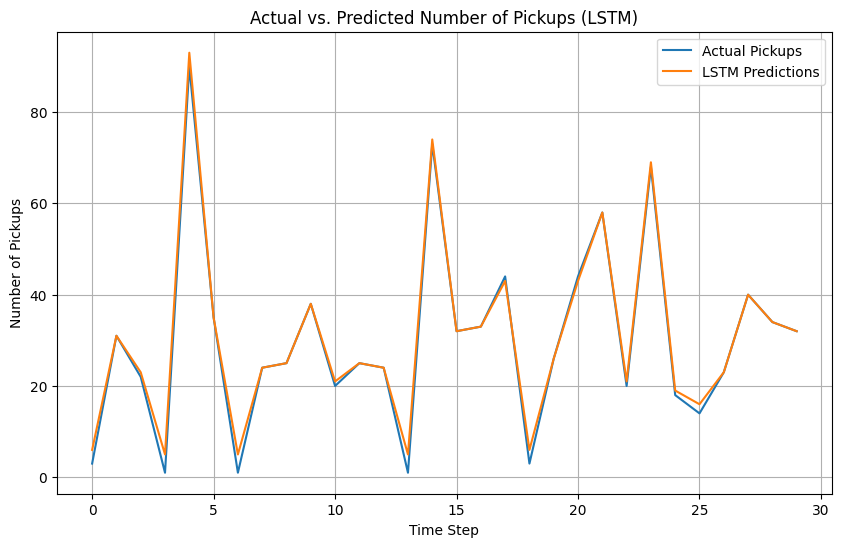

In [ ]:
import matplotlib.pyplot as plt

# Using 'lstm_predictions' and 'y_test'
# 'lstm_predictions' and 'y_test' numpy arrays or pandas series with the same length.


plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='Actual Pickups')
plt.plot(lstm_predictions, label='LSTM Predictions')
plt.xlabel('Time Step')  # Or 'Date' if you have date information
plt.ylabel('Number of Pickups')
plt.title('Actual vs. Predicted Number of Pickups (LSTM)')
plt.legend()
plt.grid(True)
plt.show()